In [1]:
%load_ext sql


In [2]:
%sql sqlite:///C:/sqlite/chinook.db

# 1) Fetching Data from Different Tables

If you need to combine rows from two or more tables, you can do this in SQL using joins. In this lesson, we'll begin exploring joins and what they can do.

Here are a few takeaways you can expect by the end of this lesson:

 * How joins work

 * How to combine data from more than one table using inner joins

 * How to select columns from different tables

 * How to alias tables

 You may have noticed that some tables are linked through a column. For example, here are samples of the customer and invoice tables, respectively.

 Notice that the `customer_id` column is in both tables.

 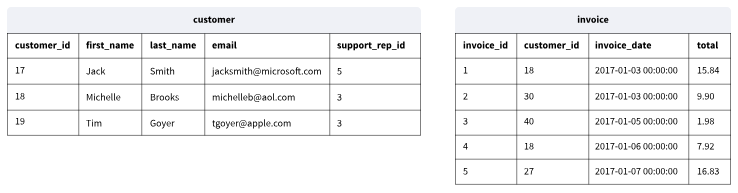

# 2) Joining Tables

Our goal on this exercise is to obtain a table that contains the following columns and rows.

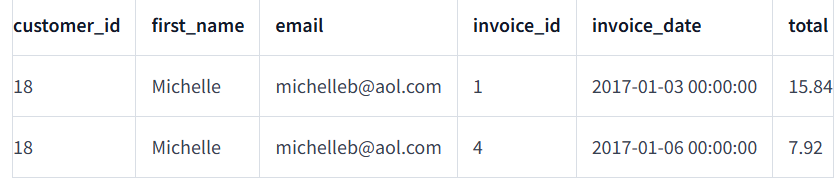

Let's focus on the task "**for each customer, find information about each of their invoices**"

We can do this with the following query.

In [5]:
%%sql
SELECT *
  FROM customer
 INNER JOIN invoice
    ON customer.customer_id = invoice.customer_id
Limit 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id,invoice_id,customer_id_1,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
40,Dominique,Lefebvre,None,"8, Rue Hanovre",Paris,None,France,75002,+33 01 47 42 71 71,None,dominiquelefebvre@gmail.com,4,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
27,Patrick,Gray,None,1033 N Park Ave,Tucson,AZ,USA,85719,+1 (520) 622-4200,None,patrick.gray@aol.com,4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83



# 3) The Syntax

```sql
SELECT *
  FROM customer
 INNER JOIN invoice
    ON customer.customer_id = invoice.customer_id;
```

We introduced two new clauses: `INNER JOIN` and `ON`. Let's review the syntax:

1. It begins normally with `SELECT *` to select all columns.

1. Secondly, comes `FROM customer` specifying from which table we're selecting the data.

1. We then include `INNER JOIN invoice`.

1. We end with `ON customer.customer_id = invoice.customer_id`.

Let's now focus on the new clauses.

* `FROM customer INNER JOIN invoice` tells SQL that we'll be joining `customer` and `invoice`

* `ON customer.customer_id = invoice.customer_id` indicates **how** we'll join the tables: we're joining the tables on rows where the `customer_id` column in customer table equals the `customer_id` column in invoice table.
    
    * Note that we refer to the column in a table using the blueprint `table_name.column_name`. Without this, the SQL engine may not know what you mean.

There are many types of joins. When we write only `JOIN` and don't specify the type, SQL defaults to `INNER JOIN`, so including INNER is optional. Thus, we can rewrite the query above like this:

## Instructions

Write a query that inner-joins `invoice_line` and `track` such that each row in the result will have the **invoices** to which the **tracks** belong, as well as their **names**.

In [7]:
%%sql
SELECT *    
  FROM invoice_line
  JOIN track
    ON invoice_line.track_id = track.track_id
 LIMIT 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id_1,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_1
1,1,1158,0.99,1,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99
2,1,1159,0.99,1,1159,Dust N' Bones,91,2,1,None,298374,5053742,0.99
3,1,1160,0.99,1,1160,Live and Let Die,91,2,1,None,184016,3203390,0.99
4,1,1161,0.99,1,1161,Don't Cry (Original),91,2,1,None,284744,4833259,0.99
5,1,1162,0.99,1,1162,Perfect Crime,91,2,1,None,143637,2550030,0.99


# 4) How JOINS work

On this screen, we'll dive into how joins work. To do this, we'll use the fake tables hue and palette. These tables aren't in the Chinook database. We're using them only as examples.

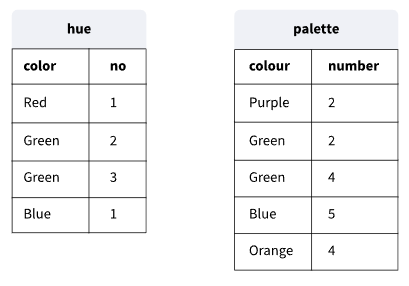

Consider the following query:

```sql
SELECT *
  FROM hue
  JOIN palette
    ON hue.color = palette.colour;
```
We'll examine how SQL processes this query.

1. Firstly, SQL will select the first row of the table in `hue`.

1. Then it will iterate over all rows in `palette` and do the following:
    * Check whether `hue.color` is equal to `palette.colour`.

    * For those that are equal, include them in the result.

> Swaping will return the same data if we swap the tables in `FROM` and `JOIN`.

# 5) Selecting Columns

Note that we swap invoice with customer. As we learned, this won't affect which data we see (although it is likely to change the order of both columns and rows).

The previous query returns many columns. Let's try to fetch just a few of them, namely `invoice_id`, `invoice_date`, `total`, `customer_id` and `email`.

Since `customer_id` is available in both tables, the SQL engine doesn't know which of them to use. That they would have the same values (after all, we're specifying `customer.customer_id = invoice.customer_id`) is a detail that many SQL dialects don't handle and, as we'll learn in the next lesson, doesn't always happen.

So we need a way to specify from which table we want to fetch `customer_id`. Here's how:

```sql
SELECT invoice_id, invoice_date, total, customer.customer_id, email
  FROM invoice
  JOIN customer
    ON customer.customer_id = invoice.customer_id;

```
Note that instead of `customer_id`, we selected `customer.customer_id`. This is similar to the `ON` clause: `table_name.column_name`.

## Instructions

Join customer and invoice on an appropriate column in such a way that the header looks like this:

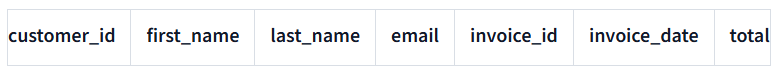

In [8]:
%%sql
SELECT customer.customer_id, first_name, last_name, email,invoice_id,invoice_date, total
  FROM invoice
  JOIN customer
    ON customer.customer_id = invoice.customer_id
Limit 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


customer_id,first_name,last_name,email,invoice_id,invoice_date,total
18,Michelle,Brooks,michelleb@aol.com,1,2017-01-03 00:00:00,15.84
30,Edward,Francis,edfrancis@yachoo.ca,2,2017-01-03 00:00:00,9.9
40,Dominique,Lefebvre,dominiquelefebvre@gmail.com,3,2017-01-05 00:00:00,1.98
18,Michelle,Brooks,michelleb@aol.com,4,2017-01-06 00:00:00,7.92
27,Patrick,Gray,patrick.gray@aol.com,5,2017-01-07 00:00:00,16.83


# 6) Selecting All Columns from One Table

It's also possible to select just a few columns from one of the tables and all columns from the other by using `*`

For example, let's say we want to add the customer's email to each row in the invoice table. We can do this using the following query:

```sql
SELECT invoice.*, customer.email
  FROM invoice
  JOIN customer
    ON invoice.customer_id = customer.customer_id;
```
Note `invoice.*`. As before, we use `*` to select all columns. **It's a best practice to spell out all column names**

Speaking of best practices, here's one more: we recommend including the table from which we're selecting the columns when using a `JOIN` clause even if there is no ambiguity — it makes the data's origin easier to determine. As such, we would rewrite the query from the previous screen like this:

```sql
SELECT invoice.invoice_id, invoice.invoice_date, invoice.total,
       customer.customer_id, customer.email
  FROM invoice
  JOIN customer
    ON customer.customer_id = invoice.customer_id;
```

Note, also, how we listed the column names from different tables in separate lines. It's a best practice to write different kinds of expressions on different lines, specifically the following:

* Column names from different tables

* Expressions like calculations and functions

* Summary statistics

## Instructions

1. Explore the tables album and artist. Pay attention to their respective columns.


1. Rewrite the following query using the best practices from the learn section above.

```sql
SELECT album.*, artist.*
  FROM album
  JOIN artist
    ON album.artist_id = artist.artist_id;
```

In [10]:
%%sql
SELECT album.album_id,album.title,album.artist_id,
       artist.artist_id, artist.name
  FROM album
  JOIN artist
    ON album.artist_id = artist.artist_id
LIMIT 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


album_id,title,artist_id,artist_id_1,name
1,For Those About To Rock We Salute You,1,1,AC/DC
2,Balls to the Wall,2,2,Accept
3,Restless and Wild,2,2,Accept
4,Let There Be Rock,1,1,AC/DC
5,Big Ones,3,3,Aerosmith


# 7) Aliasing in Joins

Selecting columns in queries that use joins can add a lot of text, making the query hard to read. Luckily, just like we can alias columns, we can also alias table names. This helps make our queries easier to write and more readable.

We'll alias `invoice` as `i` and `customer` as `c`:

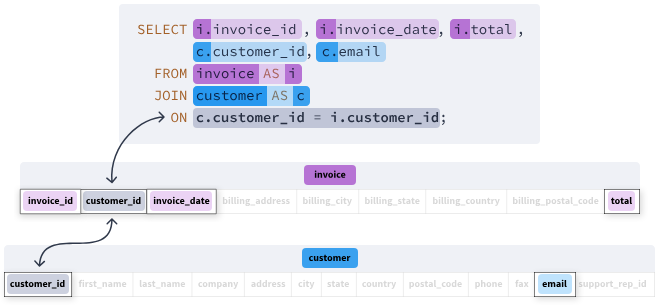

Note the following:

* The syntax is similar to aliasing column names: we use `AS`.

* We used the alias to specify from which table the column comes for both the `SELECT` and the `ON` clauses.

* It is common practice to use the **first letter** of the table name as its alias, which helps in quickly identifying the table each column belongs to. For example, **i for invoice** and **c for customer.**

* By using aliases, our query is now shorter and easier to read.

## Instructions

1. Write a query that does the following:

* Joins `track` to `genre` on an appropriate column

* Includes `track_id`, `name`, `composer`, and `name`

    * Aliases track.name as `track_name` and genre.name as `genre`

* Uses table aliases

* Follows the best practices you've learned

    * Spell out all column names
    
    * Include the table from which we're selecting the columns when using a `JOIN` clause

    * Write different kinds of expressions on different lines

    * Use river indentation on each line

In [12]:
%%sql
SELECT t.track_id, t.name AS track_name, t.composer,
       g.name as genre
  FROM track as t
  JOIN genre as g
    ON t.genre_id = g.genre_id 
LIMIT 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


track_id,track_name,composer,genre
1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",Rock
2,Balls to the Wall,None,Rock
3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",Rock
4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",Rock
5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,Rock
